# Classical Time Series Models

Classical Time Series Models:
* AR - Auto Regressive Model
* MA - Moving Average Model
* ARMA - Combination of AR and MA models
* ARIMA - Autoregressive Integrated Moving Average

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# Auto Regression

Auto Regression - suitable for data <b>without trend and seasonal component</b>

In [2]:
# create a linear data
data = [10, 12, 14, 16, 18, 20, 20, 22]

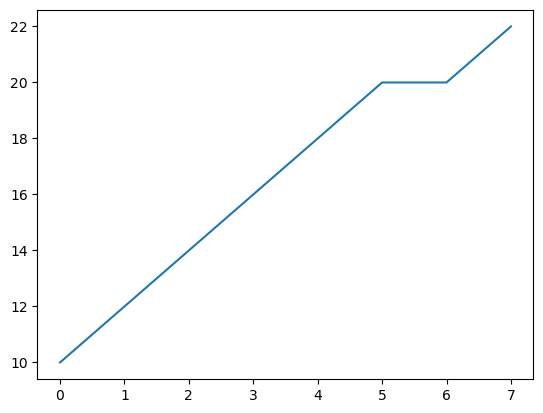

In [3]:
plt.plot(data)

In [4]:
ARmodel = AutoReg(data, lags=1)
ARmodel_fit = ARmodel.fit()

In [5]:
y_pred = ARmodel_fit.predict(8,10)

In [6]:
y_pred

array([23.125     , 24.14453125, 25.06848145])

In [7]:
pred_list = y_pred.tolist()
combinedlst = data + pred_list

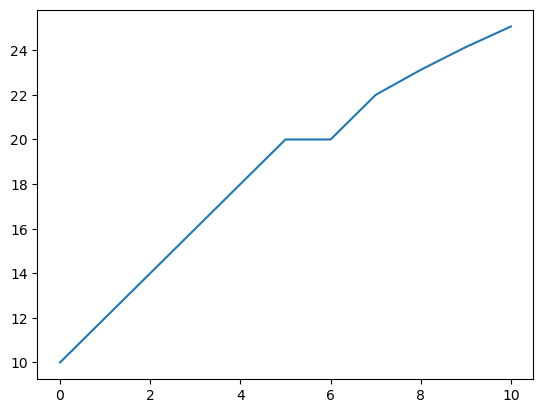

In [8]:
plt.plot(combinedlst)

# Moving Average example

Moving Average Model works on the Residuals

Suitable for data <b>without trend and seasonality</b>

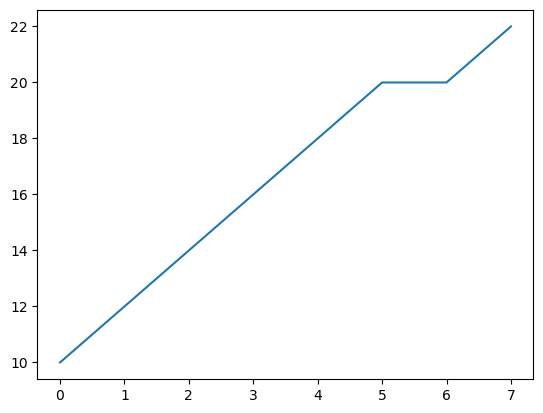

In [9]:
plt.plot(data)

In [10]:
MAmodel = ARIMA(data, order=(0,0,1)) # model with AR=0 and MA=1
MAmodel_fit = MAmodel.fit()

In [11]:
y_pred = MAmodel_fit.predict(8, 10)

In [12]:
y_pred

array([20.35252229, 16.49895187, 16.49895187])

In [13]:
pred_list = y_pred.tolist()
combinedlst = data + pred_list

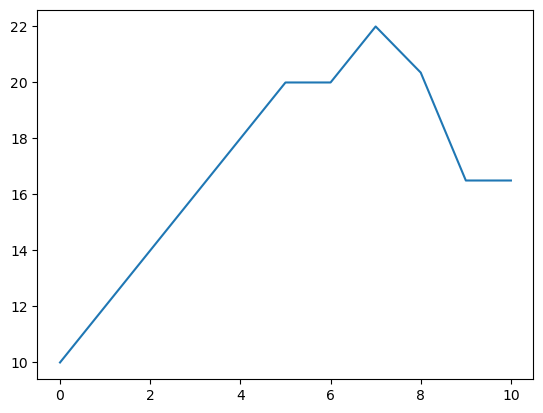

In [14]:
plt.plot(combinedlst)

* AR predictions are based on the past trend
* MA takes errors of the residuals into consideration to forcast

# Autoregressive Moving Average (ARMA)

Dataset: https://github.com/rrajmp9/Australia-drug-sales-prediction/blob/master/AusAntidiabeticDrug.csv

In [15]:
# data - australian drug sales
df = pd.read_csv('../data/data_ts/TimeSeries_australian_drug_sales.csv')

In [16]:
df.head()

,Date,Value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565869


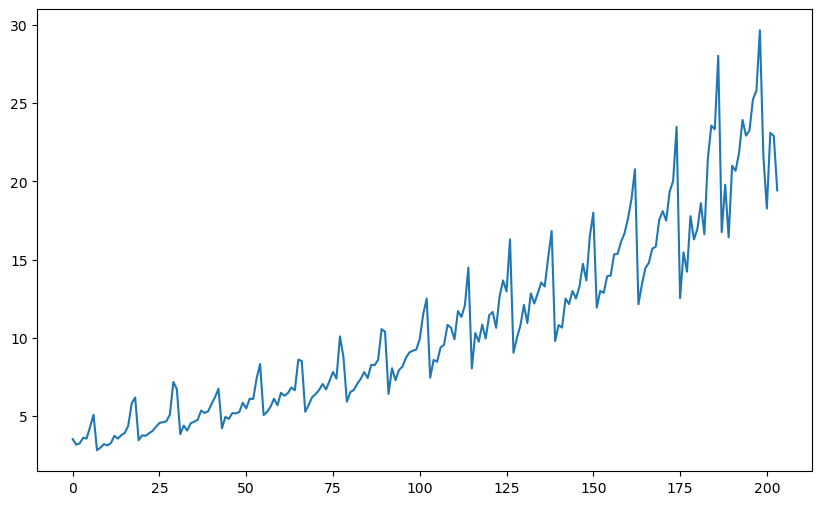

In [17]:
plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(df['Value'])

In [18]:
# ARMA(1,1)
ARMAmodel = ARIMA(df['Value'], order=(1,0,1))
ARMAmodel_fit = ARMAmodel.fit()

In [19]:
y_pred = ARMAmodel_fit.predict(len(df), len(df)+2)

In [20]:
y_pred

204    21.237106
205    21.181973
206    21.127162
Name: predicted_mean, dtype: float64

In [21]:
y_pred = pd.DataFrame(y_pred)

In [22]:
y_pred = y_pred.rename(columns={'predicted_mean': 'Value'})

In [23]:
combined_df = pd.concat([df,y_pred], axis=0)

In [24]:
combined_df.tail()

,Date,Value
202,01-05-2008,22.912510
203,01-06-2008,19.431740
204,NaN,21.237106
205,NaN,21.181973
206,NaN,21.127162


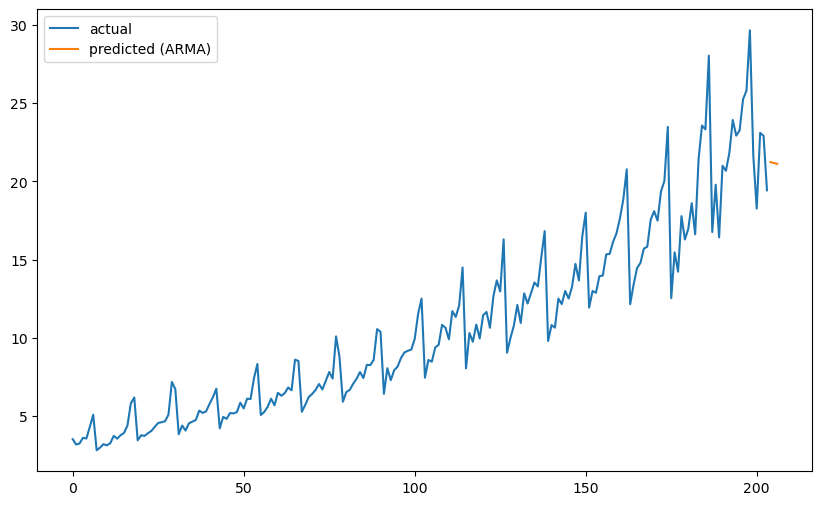

In [25]:
plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(df['Value'], label='actual')
plt.plot(y_pred['Value'], label='predicted (ARMA)')
plt.legend()
plt.show()

# Autoregressive Integrated Moving Average

ARIMA(data, order=(1,1,1)) p, d, q
* p - auto regression component
* d - integration component
* q - moving average component

Sometimes we should just run ARIMA with different p,d,q to choose the best

ARIMA is the most important and <b>most frequently used</b> model

In [26]:
ARIMAmodel = ARIMA(df['Value'], order=(1,1,1))
ARIMAmodel_fit = ARIMAmodel.fit()

In [27]:
y_pred = ARIMAmodel_fit.predict(len(df), len(df)+2, typ='levels')

In [28]:
y_pred

204    21.203379
205    21.736449
206    21.896846
Name: predicted_mean, dtype: float64

In [29]:
y_pred = pd.DataFrame(y_pred)

In [30]:
y_pred

,predicted_mean
204,21.203379
205,21.736449
206,21.896846


In [31]:
y_pred = y_pred.rename(columns={'predicted_mean': 'Value'})

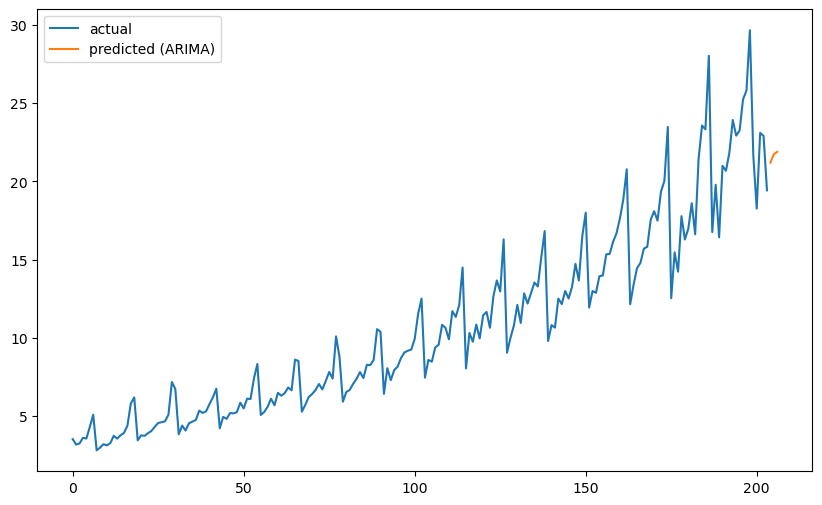

In [32]:
plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(df['Value'], label='actual')
plt.plot(y_pred['Value'], label='predicted (ARIMA)')
plt.legend()
plt.show()

## More predicted dates

In [33]:
ARIMAmodel = ARIMA(df['Value'], order=(5,1,7))
ARIMAmodel_fit = ARIMAmodel.fit()

In [34]:
y_pred = ARIMAmodel_fit.predict(len(df), len(df)+7, typ='levels')

In [35]:
y_pred

204    24.302175
205    23.760536
206    26.174866
207    24.113197
208    24.087657
209    24.581361
210    24.264047
211    21.269360
Name: predicted_mean, dtype: float64

In [36]:
y_pred = pd.DataFrame(y_pred)

In [37]:
y_pred

,predicted_mean
204,24.302175
205,23.760536
206,26.174866
207,24.113197
208,24.087657
209,24.581361
210,24.264047
211,21.269360


In [38]:
y_pred = y_pred.rename(columns={'predicted_mean': 'Value'})

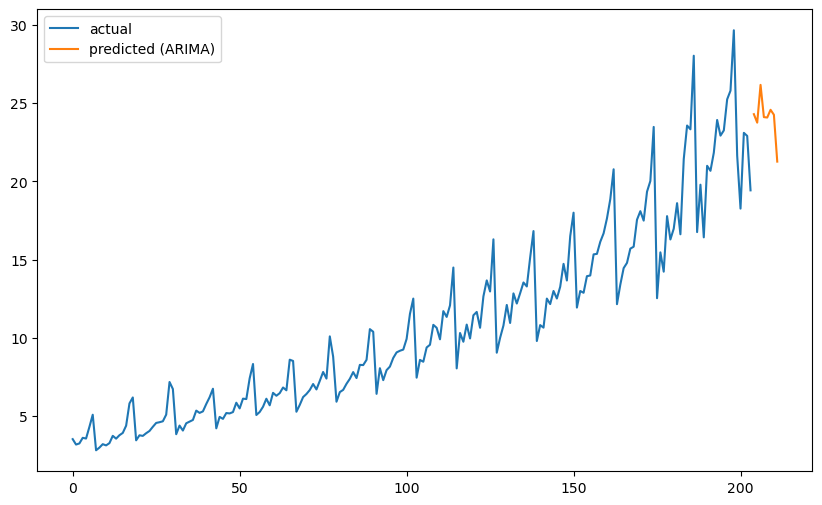

In [39]:
plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(df['Value'], label='actual')
plt.plot(y_pred['Value'], label='predicted (ARIMA)')
plt.legend()
plt.show()